In [2]:
#Fig1-Fig5 Visualization (Written by Chantelle)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

amenities = pd.read_csv("distancesamenities.csv")
hdb = pd.read_csv("distanceshdb.csv")
purchase = pd.read_csv("distancespurchase.csv")

purchase['cost'] = purchase['cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)
purchase.head(6)

,type,sector,lat,long,region,cost,centerdist
0,purchase,1,1.284009,103.850497,central,11200.0,0.848545
1,purchase,2,1.285176,103.848180,central,11200.0,0.745768
2,purchase,3,1.291473,103.851073,central,11200.0,0.121358
3,purchase,4,1.301168,103.857824,central,11200.0,1.364537
4,purchase,5,1.291274,103.857184,central,11200.0,0.800654
5,purchase,6,1.286202,103.853073,central,11200.0,0.694349


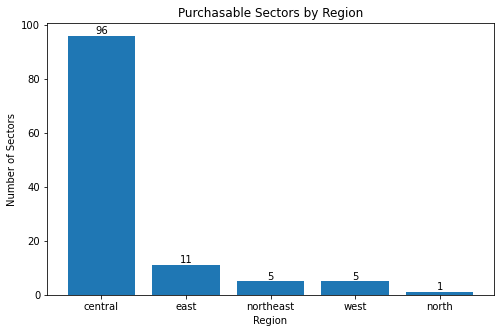

In [3]:
#sectors by region
sector_region_count = purchase['region'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sector_region_count.index, sector_region_count)
plt.title("Purchasable Sectors by Region")
plt.ylabel("Number of Sectors")
plt.xlabel("Region")

for i in range(len(sector_region_count.index)):
    plt.text(sector_region_count.index[i], sector_region_count[i], sector_region_count[i], ha='center', va='bottom')

Text(0.5, 0, 'Cost ($)')

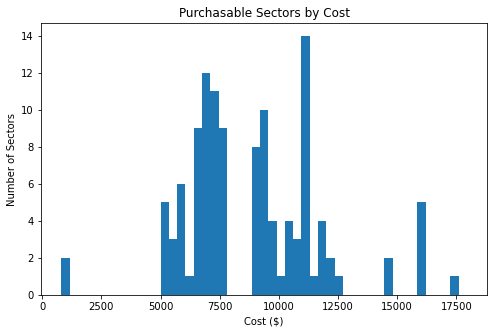

In [4]:
#sector by cost
bins = np.arange(800, 18000, 350)

plt.figure(figsize=(8, 5))
plt.hist(purchase['cost'], bins=bins)
#test = (purchase['cost']).to_dict()
#plt.hist(test.values(), bins=bins)

plt.title("Purchasable Sectors by Cost")
plt.ylabel("Number of Sectors")
plt.xlabel("Cost ($)")

([<matplotlib.axis.XTick at 0x269735b3430>,
 [Text(1, 0, 'central'),
  Text(2, 0, 'east'),
  Text(3, 0, 'northeast'),
  Text(4, 0, 'west'),
  Text(5, 0, 'north')])

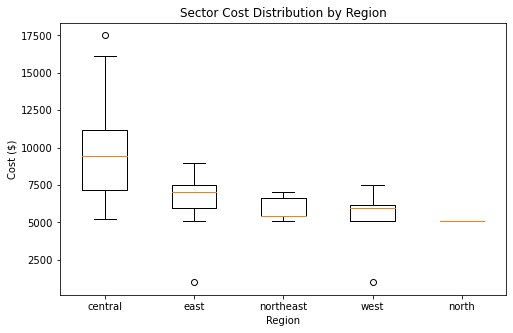

In [5]:
#sector cost distribution by region
region_cost = {}
region = (purchase['region'].unique()).tolist()

x = np.arange(len(region))

for i in region:
    region_cost[i] = (purchase.loc[purchase['region'] == i]['cost']).tolist()

plt.figure(figsize=(8,5))
plt.boxplot([region_cost['central'], region_cost['east'], region_cost['northeast'], region_cost['west'], region_cost['north']])
plt.title("Sector Cost Distribution by Region")
plt.ylabel("Cost ($)")
plt.xlabel("Region")
plt.xticks(x+1, region)

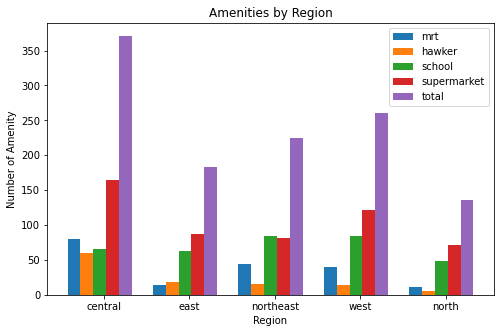

In [6]:
#amenities by region
df_mrt = amenities.loc[amenities['type'] == 'mrt']
df_hawker = amenities.loc[amenities['type'] == 'hawker']
df_sch = amenities.loc[amenities['type'] == 'school']
df_mart = amenities.loc[amenities['type'] == 'supermarket']

mrt_region_count = df_mrt['region'].value_counts()
hawker_region_count = df_hawker['region'].value_counts()
sch_region_count = df_sch['region'].value_counts()
mart_region_count = df_mart['region'].value_counts()
amenities_region_count = amenities['region'].value_counts()

mrt_region_dict = {}
hawker_region_dict = {}
sch_region_dict = {}
mart_region_dict = {}
amenities_region_count = {}

for i in region:
    mrt_region_dict[i] = (df_mrt.loc[df_mrt['region'] == i]['name']).tolist()
    hawker_region_dict[i] = (df_hawker.loc[df_hawker['region'] == i]['name']).tolist()
    sch_region_dict[i] = (df_sch.loc[df_sch['region'] == i]['name']).tolist()
    mart_region_dict[i] = (df_mart.loc[df_mart['region'] == i]['name']).tolist()
    amenities_region_count[i] = (amenities.loc[amenities['region'] == i]['name']).tolist()

mrt_region = []
hawker_region = []
sch_region = []
mart_region = []
amenities_region = []
    
for i in region:
    mrt_region.append(len(mrt_region_dict[i]))
    hawker_region.append(len(hawker_region_dict[i]))
    sch_region.append(len(sch_region_dict[i]))
    mart_region.append(len(mart_region_dict[i]))
    amenities_region.append(len(amenities_region_count[i]))

x = np.arange(len(region))

plt.figure(figsize=(8,5))
plt.bar(x-0.35, mrt_region, width=0.15, label='mrt')
plt.bar(x-0.20, hawker_region, width=0.15, label='hawker')
plt.bar(x-0.05, sch_region, width=0.15, label='school')
plt.bar(x+0.10, mart_region, width=0.15, label='supermarket')
plt.bar(x+0.25, amenities_region, width=0.15, label='total')

plt.title("Amenities by Region")
plt.ylabel("Number of Amenity")
plt.xlabel("Region")
plt.xticks(x, region)
plt.legend()

Text(0.5, 0, 'Year of Initial Construction')

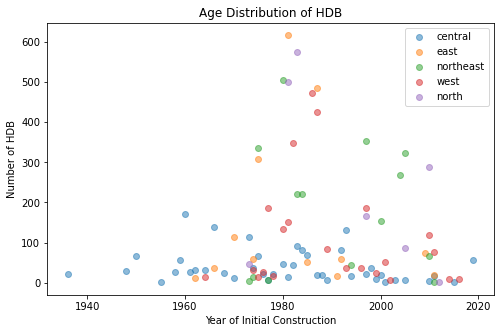

In [7]:
#age / number of hdb by region

#x-year, y-number, c-region

year_start = (hdb['year-start'].unique()).tolist()
central_year_dict = ((hdb.loc[hdb['region'] == 'central']['year-start']).value_counts()).to_dict()
east_year_dict = ((hdb.loc[hdb['region'] == 'east']['year-start']).value_counts()).to_dict()
northeast_year_dict = ((hdb.loc[hdb['region'] == 'northeast']['year-start']).value_counts()).to_dict()
west_year_dict = ((hdb.loc[hdb['region'] == 'west']['year-start']).value_counts()).to_dict()
north_year_dict = ((hdb.loc[hdb['region'] == 'north']['year-start']).value_counts()).to_dict()

central_year_count = []
east_year_count = []
northeast_year_count = []
west_year_count = []
north_year_count = []

for i in year_start:
        central_year_count.append(central_year_dict[i] if i in central_year_dict else None)
        east_year_count.append(east_year_dict[i] if i in east_year_dict else None)
        northeast_year_count.append(northeast_year_dict[i] if i in northeast_year_dict else None)
        west_year_count.append(west_year_dict[i] if i in west_year_dict else None)
        north_year_count.append(north_year_dict[i] if i in north_year_dict else None)

plt.figure(figsize=(8,5))
plt.scatter(year_start, central_year_count, label='central', alpha=0.5)
plt.scatter(year_start, east_year_count, label='east', alpha=0.5)
plt.scatter(year_start, northeast_year_count, label='northeast', alpha=0.5)
plt.scatter(year_start, west_year_count, label='west', alpha=0.5)
plt.scatter(year_start, north_year_count, label='north', alpha=0.5)
plt.legend()
plt.title("Age Distribution of HDB")
plt.ylabel("Number of HDB")
plt.xlabel("Year of Initial Construction")